In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
'''scaler = StandardScaler()
scaler.fit(bos) 
bos = scaler.transform(bos)'''

'scaler = StandardScaler()\nscaler.fit(bos) \nbos = scaler.transform(bos)'

In [8]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [9]:
'''scaler = StandardScaler()
scaler.fit(X) 
X = scaler.transform(X)'''

'scaler = StandardScaler()\nscaler.fit(X) \nX = scaler.transform(X)'

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

<Figure size 640x480 with 1 Axes>

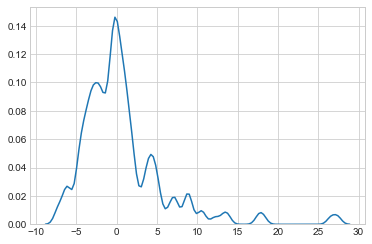

In [13]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


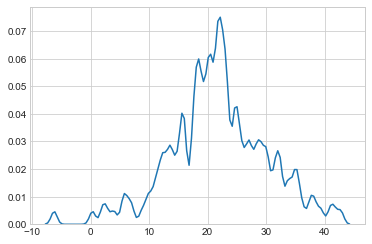

In [14]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

# Implementing GD on LINEAR REGRESSION

In [15]:
import random
import math
import collections
import numpy as np
import random

In [16]:
Y_train
print(np.asmatrix(Y_train).shape)
print(np.asmatrix(X_train).shape)

(1, 339)
(339, 13)


In [91]:
learning_rate =  0.16
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()
w0_random.shape

y = np.asmatrix(Y_train).reshape(-1,1)
x = np.asmatrix(X_train)

n_iter = 5000
itr = 1
partial_deriv_m = 0
partial_deriv_b = 0

for j in range(1, n_iter):
    print(itr)
    itr = itr + 1
    
    for i in range(len(x)):
        #Computing gradient
        partial_deriv_m += x[i].reshape(-1,1) * (y[i] - (np.dot(x[i],w0) + b0)) #np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
        partial_deriv_b += y[i] - ((np.dot(x[i],w0)+b0)) #-2*(y[:,i] - (np.dot(x[i] , w0) + b0))
    w1 = w0 - learning_rate *(-2/len(x))* partial_deriv_m 
    b1 = b0 - learning_rate *(-2/len(x))* partial_deriv_b
    
    if (w0==w1).all() and b0 == b1:
        #Stop on convergence
        print("Breaking")
        break
        
    else:
        w0 = w1
        b0 = b1
        learning_rate = learning_rate/2

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
Breaking


In [92]:
#Y = np.asmatrix(Y_train)
X = np.asmatrix(X_test)

In [93]:
#y_pred = np.zeros(X_test.shape[0])
#for i in range (X_test.shape[0]):
    #y_pred[i] = np.dot(X[i] , w1) + b1
    
y_pred = np.dot(X,w0) + b0

In [94]:
Y_test.shape
type(Y_test)
np.array(Y_train.iloc[:].tolist()).reshape((-1, 1))

array([[13.4],
       [23.6],
       [27.5],
       [22.2],
       [17.7],
       [14.3],
       [21.7],
       [ 8.4],
       [15.3],
       [20.3],
       [32. ],
       [20. ],
       [19.1],
       [28.7],
       [46. ],
       [22.6],
       [23.9],
       [21.9],
       [15.6],
       [50. ],
       [25. ],
       [37.9],
       [21.6],
       [19.3],
       [17.5],
       [22.9],
       [15. ],
       [27.5],
       [10.2],
       [23.8],
       [23.9],
       [20.1],
       [16.5],
       [33.1],
       [14.6],
       [28.4],
       [23.7],
       [12.3],
       [31.5],
       [22. ],
       [12.5],
       [35.1],
       [14.9],
       [22.9],
       [22.9],
       [19.3],
       [19.8],
       [20. ],
       [29.6],
       [20.5],
       [29. ],
       [20.7],
       [19.9],
       [11.9],
       [ 5. ],
       [23.3],
       [20.6],
       [22.9],
       [19.6],
       [14.1],
       [30.8],
       [43.1],
       [19.9],
       [13.9],
       [22.3],
       [14.3],
       [23

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation  : ",mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error for Implementation : ",mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error for Implementation  : ",np.sqrt(mean_squared_error(Y_test,y_pred)))

Mean Absolute Error for Implementation  :  3.8074679097355526
Mean Squared Error for Implementation :  33.224265422633266
Root Mean Squared Error for Implementation  :  5.764049394534476


# Implementing SKLEARN's SGD Regression 

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


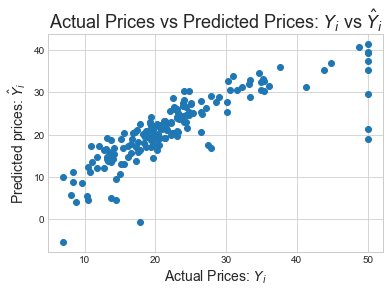

In [96]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, Y_train)

sklearn_sgd_predictions = sgd.predict(X_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(Y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

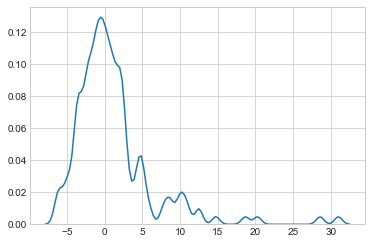

In [97]:
delta_y = Y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

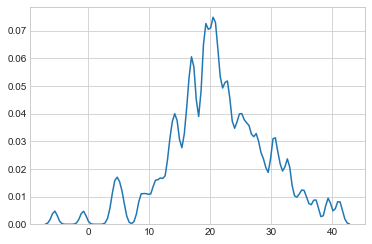

In [98]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [99]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(Y_test,sklearn_sgd_predictions))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(Y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.4311767223335665
Mean Squared Error for Implementation of SGD using SKLEARN is :  31.066143929921573
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  5.573701098006743


# Comparing the weights produced by both Manual SGD and Sklearn's SGD

In [100]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",w1)
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |    [[-0.80574401]]    |   -0.9754500170928221    |
|   2   |     [[0.30574536]]    |   0.49363150057071153    |
|   3   |    [[-0.36973406]]    |    -0.635818859287997    |
|   4   |     [[0.59980994]]    |    0.281630972816123     |
|   5   |     [[0.49189979]]    |    -0.565215870733836    |
|   6   |     [[3.68071541]]    |    3.1740900690423905    |
|   7   |     [[0.17193796]]    |   -0.4900268755019958    |
|   8   |    [[-1.28176007]]    |   -1.8832603967765258    |
|   9   |     [[0.46547646]]    |    0.6313639658750777    |
|   10  |    [[-0.31360303]]    |   -0.42689140693157135   |
|   11  |    [[-1.83076023]]    |   -1.8473563084325624    |
|   12  |     [[0.83592351]]    |    0.8828979991044843    |
|   13  |    [[-2.33919171]]    |   -2.9600826293466276    |
+-------+---------------

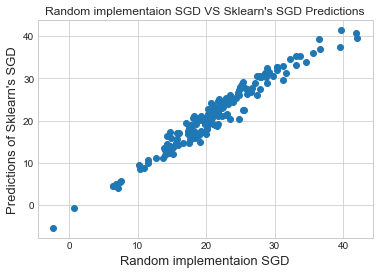

In [105]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(np.array(y_pred.tolist()), sklearn_sgd_predictions)
plt.xlabel("Random implementaion SGD",size=13)
plt.ylabel("Predictions of Sklearn's SGD",size=13)
plt.title("Random implementaion SGD VS Sklearn's SGD Predictions")
plt.show()

By observing the graphs , mean absolute error , mean squared error and root mean squared error for both (custom gd Regression and Sklearn's sgd Regression) implementation of SGD we can say that custom GD model and Sklearn's SGD model is giving  similar results.